## <font color=red>Programming For Data Analytics Project</font>

## GMIT GRAD. DIP. DATA ANALYTICS


### <font color=blue>PROBLEM STATEMENT</font>

Fictitious Pharmaceutical Company ‘Ollopa Pharmaceuticals’ manufactures the Active Pharmaceutical Ingredient (API) for its small molecule blockbuster drug ‘Asclepius’ by stepwise organic synthesis in a processing plant. The Manufacturing Science Group have been asked to optimise the production process to increase the yield of the active ingredient by monitoring the reaction endpoint using process analytical technology. The effect of changing process conditions and their relationship with reaction kinetics need to be monitored to achieve this. The Manufacturing Science Group have identified 4 Process Variables which they would like to investigate to see if there is any correlation between them and the reaction endpoint. The importance of identifying the reaction endpoint is critical for reactions where over reaction may lead to impurities being formed and the underreaction may lead to leftover starting materials whcih may not be purged from the process. 

### <font color=blue>1.CREATE THE VARIABLES</font>

**Critical Process Parameters**

|RAP(%)     |Reaction Temp      | Pre-Crystallisation pH| CO2                     |
|:-------:  |:-----------------:|:--------------------: |:-----------------------:|
| 0.2-99.9% |          0-25     | pH = 4.5-7.5          | 0-0.5%                  |

#### <font color=brown>**Variables Explained**</font>

    > **RAP** *Relative area %*: The % of Active ingredient produced during the course of the Reaction relative to the starting material<br> *We hope to determine the effects of the following variables on its rate*

>**Reaction Temp:** Temp the reaction reaches (it is an exothermic reaction, i.e. one in which heat is produced)<br>
**Pre crystallisation pH:** The pH of the batch during the reaction<br>
**CO2(%):** CO2 Levels produced during the reaction as a by-product<br>

The In-Process variables are the parameters which influence the yield and quality of the active ingredient. A manufacturing process which deviates from these parameters may have low yields and/or high impurity levels.

For the purposes of creating a dataset we will investigate 100 data points of variables i.e. we will monitor a reaction over 10hrs, with the process variables being measured ten times per hour using inline process analytical techniques.

The effect or contribution (if any) of these variables on the reaction will be investigated.




In [48]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.integrate import odeint #odeint is a library which allows us to create and solve differential equations in python
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline  

#number of observations

size = 100 

#Random seed set to maintain repeatability of the dataset
np.random.seed(876556788)

#List of variables
Time = np.arange(1,101) # Time in hours from start of reaction

#RAP Will be calculated as a model to mimic a first order kinetic curve

mu, sigma = 3., .1 # mean and standard deviation

#RxnTemp data will be created to correlate with the change in RAP over time.

pH = np.round(np.random.normal(loc=7.0, scale=0.25, size=size),2)

CO2 = np.round(np.random.normal(loc=0.25, scale=0.025, size=size),2)



**We will now generate a function to create a differential curve to model the increase in RAP during the reaction**

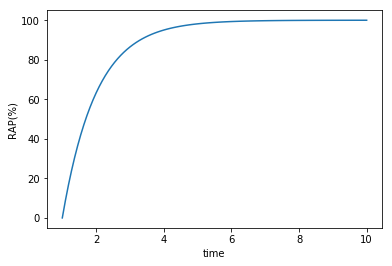

In [34]:
#Credit: Adapted from (https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations)
#Placeholder for some simple code for graphing a differential curve to be adapted
#in order to mimic first order reaction  kinetics

# function that returns dy/dt
def model(y, t):
    dydt = -y + 100.0
    return dydt

# initial condition for y
y0 = 0

# time points
t = np.linspace(1, 10, 100) 

# solve ODE
y = (odeint(model,y0,t)) #uses odeint function to model the relationship between dy/dt and t

#RAP = pd.DataFrame(y)
# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('RAP(%)')
plt.show()

In [35]:
RAP = y.flatten() #Converts multidimensional array to single dimensional array, allowing it be be concatenated with the 
# other random arrays in our dataset
RAP

array([ 0.        ,  8.68992838, 16.62470817, 23.86996134, 30.4856072 ,
       36.52635815, 42.04217217, 47.07866593, 51.67749203, 55.87668331,
       59.71096783, 63.21205585, 66.40890183, 69.32794419, 71.99332387,
       74.42708396, 76.64935204, 78.67850659, 80.53132897, 82.22314249,
       83.76793855, 85.17849304, 86.46647129, 87.64252522, 88.71638086,
       89.69691925, 90.59224955, 91.40977629, 92.15626055, 92.83787585,
       93.46025929, 94.02855804, 94.54747204, 95.02129266, 95.4539387 ,
       95.84898812, 96.20970806, 96.53908169, 96.83983295, 97.11444919,
       97.36520142, 97.59416354, 97.80322897, 97.9941268 , 98.1684357 ,
       98.32759731, 98.47292789, 98.60562935, 98.72679916, 98.83743938,
       98.93846506, 99.03071166, 99.11494212, 99.19185301, 99.2620804 ,
       99.32620507, 99.38475736, 99.4382215 , 99.48703965, 99.53161553,
       99.5723178 , 99.60948307, 99.64341871, 99.67440537, 99.7026993 ,
       99.72853452, 99.75212467, 99.77366486, 99.79333319, 99.81

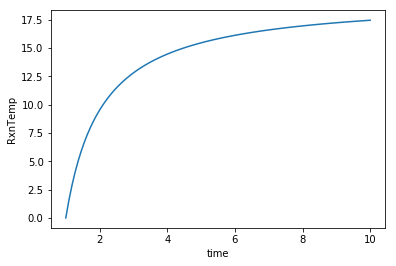

In [36]:
#Some experimentation to try to model Temp data to fit with RAP data
#Lots of random experimentation with help from (https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.math.html)

def model(z, t):
    dydt = (np.cos(1/t) - 1)*(-40)
    return dydt

# initial condition for y
z0 = 0

# time points
t = np.linspace(1, 10, 100) 

# solve ODE
z = (odeint(model,z0,t)) #uses odeint function to model the relationship between dy/dt and t

#RAP = pd.DataFrame(y)
# plot results
plt.plot(t,z)
plt.xlabel('time')
plt.ylabel('RxnTemp')
plt.show()

In [37]:
RxnTemp = z.flatten() #Converts mulitdimensional array to single dimensional array, allowing it be be concatenated with the 
# other random arrays in our dataset
RxnTemp

array([ 0.        ,  1.54288603,  2.86413237,  4.00730501,  5.00550263,
        5.88424716,  6.66349268,  7.35904116,  7.98355449,  8.5472885 ,
        9.05863286,  9.52451329,  9.95069493, 10.34201405, 10.70255659,
       11.03579744, 11.34470996, 11.63185285, 11.89943965, 12.14939484,
       12.38339932, 12.60292765, 12.80927864, 13.00360071, 13.186913  ,
       13.36012297, 13.52404128, 13.67939432, 13.82683486, 13.96695111,
       14.10027453, 14.22728645, 14.34842388, 14.46408444, 14.57463074,
       14.68039414, 14.78167798, 14.87876055, 14.97189759, 15.06132449,
       15.14725834, 15.22989962, 15.30943378, 15.38603263, 15.45985553,
       15.53105053, 15.59975537, 15.6660983 , 15.73019893, 15.79216898,
       15.85211283, 15.91012815, 15.96630649, 16.02073364, 16.07349018,
       16.1246518 , 16.17428969, 16.22247087, 16.2692585 , 16.31471214,
       16.35888799, 16.40183915, 16.44361583, 16.48426552, 16.52383319,
       16.56236144, 16.59989069, 16.63645926, 16.67210356, 16.70

In [38]:
#Output the Data as NUMPY arrays
print(('Time(hrs)=', Time), ('RAP =', RAP), ('pH =', pH), ('Reaction Temp(C) =', RxnTemp), ('CO2 =', CO2))

('Time(hrs)=', array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])) ('RAP =', array([ 0.        ,  8.68992838, 16.62470817, 23.86996134, 30.4856072 ,
       36.52635815, 42.04217217, 47.07866593, 51.67749203, 55.87668331,
       59.71096783, 63.21205585, 66.40890183, 69.32794419, 71.99332387,
       74.42708396, 76.64935204, 78.67850659, 80.53132897, 82.22314249,
       83.76793855, 85.17849304, 86.46647129, 87.64252522, 88.71638086,
       89.69691925, 90.59224955, 91.40977629, 92.15626055

### <font color=blue>2. CREATE A DATAFRAME OF ALL VARIABLES</font>

**Each of the 4 numpy arrays will now be concatenated to create 1 dataframe**

[1][Column names](https://docs.python.org/3.4/tutorial/datastructures.html#dictionaries)

In [39]:

columns = {"Time(hrs)": Time, "RAP": RAP, "pH": pH, "Reaction Temp(C)": RxnTemp,  "CO2": CO2} #Add labels to the columns

Batchdf = pd.DataFrame(columns, 
                  columns=["Time(hrs)", "RAP", "pH", "Reaction Temp(C)", "CO2"]) #Create the dataframe

Batchdf

,Time(hrs),RAP,pH,Reaction Temp(C),CO2
0,1,0.000000,7.19,0.000000,0.22
1,2,8.689928,6.82,1.542886,0.29
2,3,16.624708,6.83,2.864132,0.23
3,4,23.869961,7.13,4.007305,0.25
4,5,30.485607,6.75,5.005503,0.25
5,6,36.526358,7.31,5.884247,0.26
6,7,42.042172,6.93,6.663493,0.30
7,8,47.078666,6.92,7.359041,0.27
8,9,51.677492,7.09,7.983554,0.29
9,10,55.876683,7.44,8.547288,0.27


**The batches.describe() function tabulates the summary statistics of the dataset and gives an overview of what the data looks like and how the Process Variables relaqte to eachother**

In [40]:
Batchdf.describe() #Table of summary statistics

,Time(hrs),RAP,pH,Reaction Temp(C),CO2
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,88.493722,6.998700,14.311023,0.248300
std,29.011492,21.768290,0.236501,3.801136,0.027082
min,1.000000,0.000000,6.370000,0.000000,0.190000
25%,25.750000,89.451785,6.820000,13.316820,0.230000
50%,50.500000,98.887952,7.010000,15.822141,0.250000
75%,75.250000,99.882823,7.175000,16.875896,0.262500
max,100.000000,99.987659,7.620000,17.455970,0.320000


### <font color=blue> 2.Create a Scatterplot Matrix of the DataFrame</font>


In [41]:
#[Credit] (https://github.com/spyder-ide/spyder/issues/7312)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #Workaround to remove 'FutureWarnings' message which appears to be a bug. 

**The following function *pairplot* using the Seaborn package, creates a scatterplot matrix of variables and includes a density estimate (in the diagonal axis). It's a useful package to visualise data with multiple variables and get a quick idea of the relationships between variables. [Python for Data Analysis; McKinney, W.; O'Reilly; p.282]**

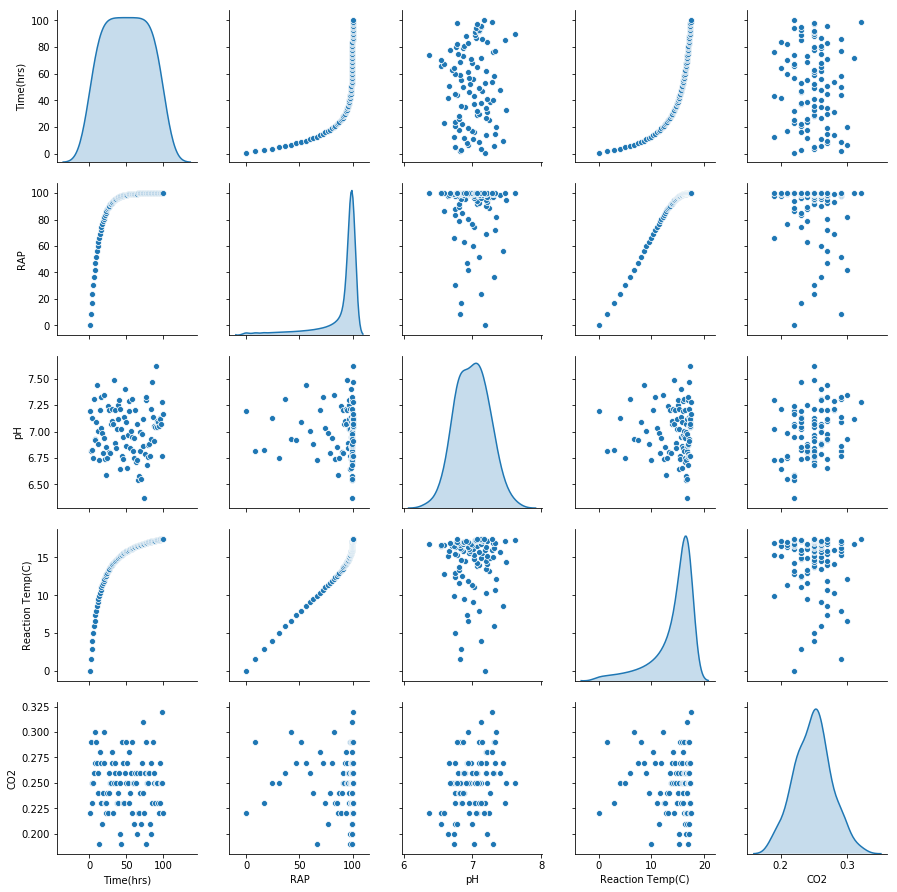

In [42]:
%matplotlib inline
sns.pairplot(Batchdf, diag_kind='kde', plot_kws={'alpha':1.0, });#scatterplots and kde matrices of all variables


**Example scatter plot of pH V RAP**

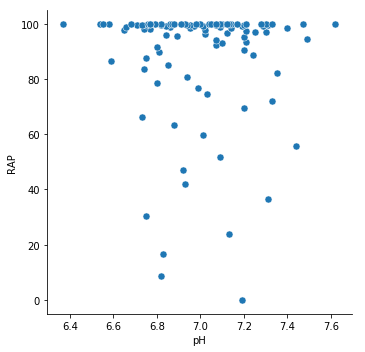

In [43]:
g = sns.FacetGrid(Batchdf, height=5, )
g.map(plt.scatter, "pH", "RAP", s=50, linewidth=.5, edgecolor="white")
g.add_legend();



**Plot The linear regression models for each variable against yield in order to determine if any linear realtionships exist between variables**

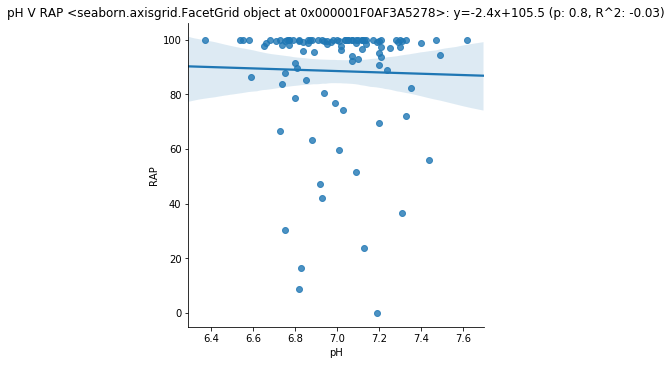

In [44]:
# get coefficients of linear fit

# Linear regression for pH V RAP
slope, intercept, r_value, p_value, std_err = stats.linregress(Batchdf['pH'],Batchdf['RAP'])

# Set line label for legend
ax = sns.lmplot(x='pH', y='RAP', data=Batchdf)

plt.title("pH V RAP {}: y={:.1f}x+{:.1f} (p: {:.1f}, R^2: {:.2f})".format(ax, slope, intercept,  p_value, r_value))
plt.show()


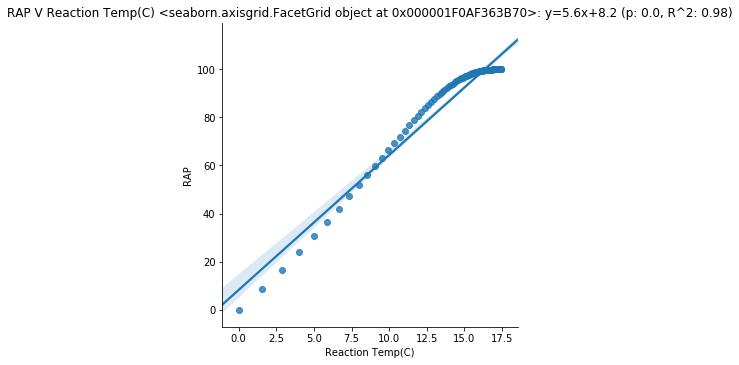

In [45]:
# get coefficients of linear fit

# Linear regression for Reaction Temp V RAP
slope, intercept, r_value, p_value, std_err = stats.linregress(Batchdf['Reaction Temp(C)'],Batchdf['RAP'])

# use line_kws to set line label for legend
ax = sns.lmplot(x='Reaction Temp(C)', y='RAP', data=Batchdf)

plt.title("RAP V Reaction Temp(C) {}: y={:.1f}x+{:.1f} (p: {:.1f}, R^2: {:.2f})".format(ax, slope, intercept,  p_value, r_value))
plt.show()

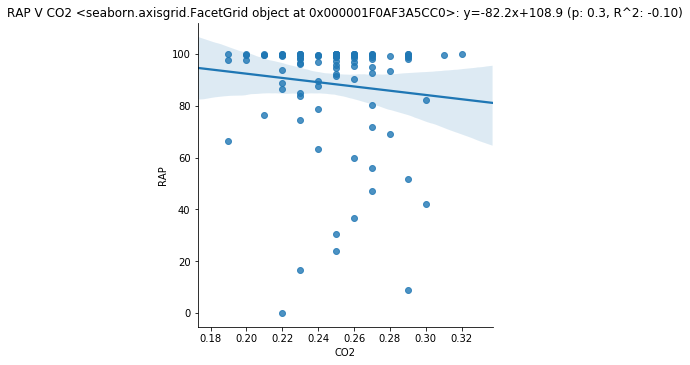

In [46]:
# get coefficients of linear fit

# Linear regression for IPC Result(%) V RAP
slope, intercept, r_value, p_value, std_err = stats.linregress(Batchdf['CO2'],Batchdf['RAP'])

# use line_kws to set line label for legend
ax = sns.lmplot(x='CO2', y='RAP', data=Batchdf)

plt.title("RAP V CO2 {}: y={:.1f}x+{:.1f} (p: {:.1f}, R^2: {:.2f})".format(ax, slope, intercept,  p_value, r_value))
plt.show()

### DISCUSSION OF LINEAR REGRESSION

It looks like the linear regression models indicate that the only relationship between variables which is linear is RAP V Reaction temp with a R^2 Value of 0.98, i.e. as the reaction progresses the temp increases. Display of the Correlation coefficients for each variable and it's relationship with RAP will help us determine the next steps in the analysis of the data.

In [89]:
 #Calculates the Pearson correlation coefficient for all variables V RAP and the *p* value for non-correlation
pHVRAP = sp.stats.pearsonr(pH,RAP)
RxnTempVRAP = sp.stats.pearsonr(RxnTemp,RAP)
CO2VRAP = sp.stats.pearsonr(CO2,RAP)

print ('pH V RAP: Correlation Coefficient', pHVRAP)
print ('Reaction Temperature V RAP: Correlation Coefficient', RxnTempVRAP,)
print ('CO2 V RAP: Correlation Coefficient', CO2VRAP)



pH V RAP: Correlation Coefficient (-0.026442303974446267, 0.7939812733690197)
Reaction Temperature V RAP: Correlation Coefficient (0.9792424749779767, 9.642665118280768e-70)
CO2 V RAP: Correlation Coefficient (-0.10230844990113637, 0.31111628143829406)


The correlation coefficient for Reaction Temperature V RAP, calculated here using the 'scipy.stats.pearson' function shows a positive correlation between the two variables. This combined with the low *p* value confirms the hypothesis that the two variables have an effect on eachother.

### CONCLUSION

The relationship between temperature and RAP shows us that as the reaction progresses the temperature rises reaching a maximum as the reaction is complete. Knowing how the reaction affects thew temperature will enable us to know when the reaction is complete and therefore when to sample for the reaction completion to be confirmed offline in the laboratory.